Lab #3: Asking a statistical question

Name: Wayne Lai, Partner: Rebecca

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Problem 1

In [74]:
# create 100k data points at 12 kelvins +- 0.4 kelvins
# add in the bad points, using append. Include the x-axis.
# from the gaussian distribution of the ppf, we want to get rid of the tails at 1/100000.

# Part A
#
# Statistical Question: We want to know the probability if a set of data can be reliable by
# factoring in the effect of temperature. Optimally, we know that the experiment works well
# under some interval temperature. However, there will be situations where bad data is acquired
# despite good temperature, or good data acquired under bad temperature. How can we use the
# temperature parameter to determine a numerical way of determine whether we should keep the
# data or not.

# statistical question in math: with the probability distribution of the data points, what are
# the numerical thresholds if we integrate and take out the top and bottom 1/100000. After
# creating the data points that follows a Gaussian Distribution, the bad points given were
# added in. The 1/100000 fraction is some arbitrary value which our group agree that signifies
# the outlier well. This fraction is calculated to be at a sigma of 4.25. Now we integrate to
# find the area under the curve at above 4.25 sigma on both high and low values. The end result
# is a upper threshold of 13.7 and lower of 10.3. This window is compared to the 8 bad values
# that were given, we find that 1/4 of bad data was still included, while 3/4 of the bad data
# was eliminated. The truth table follows..

# true positive: .99999
# false positive: 0.25
# true negative: 1.0
# false negative: 0.75

x = np.linspace(10,15,100000);

badDataP = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7];
dataPoint = norm.rvs(loc = 12, scale = 0.4, size = 100000);
totalData = np.append(dataPoint,badDataP);

# 10.3 and 13.7
# false negative at 3/4. those are the values that falls outside of the upper and lower
# threshold, compared to the values that are listed on the question. the bad data that was
# kept is 1/4.

# Part B
#
# As the threshold widens, the less good data was taken out, but we will also include a lot of
# bad data. The trend is very predictable as conversely, smaller threshold window will throw out
# more good data. Although not a definitive amount since we are dealing with a lot of numbers,
# but this technique does provide more flexibility as desired probability can be adjusted base
# on the needs of the experiment.

# Part C
#
# Yes, commission does get included in our result. For example, the 12.7 value from the bad list
# cannot be easily discarded as it is very close within accepted range. To hone in on eliminating
# this value can result in taking out many good data as we have to shrink the upper and lower
# threshold for accepted values.

Problem 2

In [75]:
# rayleigh distribution with 2 dimensional gaussian
# multivariate normal distribution is another choice

# Part 1: The Question
#
# The way to look at the problem is to start at the center of the graph. The data is looked at
# in terms of rings of infinitesimal small thickness, in our case, a ring that is one data thick.
# As the data go further away from the center, the ring gets bigger, and there will be more points
# to compare. Near the center, there should not be much difference with the data as most of the
# star is contained within. Moving further out, there will be more variability since the wobble
# is more defined, as the background can be seen easier because the star is not always blocking.
# 
# From the center of the 2 Dimensional Histogram, branching outwards, what is the
# possibility of finding data that is different compared to majority of other data within the
# same ring of the same radius from the center?
#
# With this question, the biggest problem is the interpretation of the outlier as the radius
# increases. Near the center, the outlier is the darker background, outwardly though, the outlier
# becomes the lighter yellow data. I think, through processing, we will see equal distribution at
# some point, where a sigma 5 data may not even exist.

# Part 2: In Math
#
# Take the data from some radius and compare to all data in that radius. From the set of values,
# calculate the expected value, the mean, and run it through the data to find the variance, and
# finally the sigma, standard deviation. Multiply the sigma by five, then add and minus the expected
# value to obtain the upper and lower bound of the data set. This will generally result in a gaussian
# distribution.
# When comparing different rings, the distribution is going to be different, as was mentioned, the
# outlying data flips. Assuming that the data is far from being symmetrical, we cannot use horizontal
# slices for our distribution and have it apply to the entire map. Instead, the multivariate normal
# distribution would be the more appropriate outcome. This is due to the 2 dimensional nature of the
# function, we have to believe that the probability function has two variables, it depends on both the
# x and the y value.

Problem 3

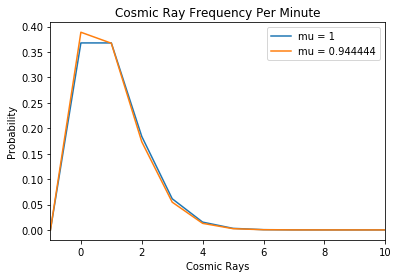

The 5 sigma value is 4.859127
At a probability of 1 in 3.5e6, the detector would pick up more than 5 cosmic ray signals.


In [76]:
# Part 1: Question
#
# The problem focuses on cosmic ray frequency given some interval of time. The rate is one a minute,
# so one will be the expected value or average. As time passes, there will be some minutes where the
# detector will recieve no cosmic ray, other minutes, the detector may recieve more than one signal.
#
# Given an interval of 15 days, with the count of 6800 cosmic rays recieved, we have an average that is
# observed. Additionally, we know the expected rate, so what would be the significance of the observation
# when we compare the two mean values? Also, what is the probability of frequencey of cosmic ray in this
# 15 day period? Does it match closely to the expected rate, or is the observed data an outlier?

# Part 2: In Math
#
# Finding the probability of the rate of frequency in some time interval can best be described with a
# poisson distribution. The peak of the probability density function will represent the average. At the
# expected rate, maximum will be at one, with variance at the same value, due to behavior of the poisson.
# At 5 sigma, we can find the outlier. This outlier represents the absurd increase of cosmic ray in that
# minute, which despite of the hole caused by the moon, there are still enough bypassing gamma rays.

from scipy.stats import poisson

totalMin = 15 * 8 * 60; # 15 days * 8 hours/day * 60 minutes/hour
newMu = 6800 / totalMin; # observed rate
x = np.arange(-1, totalMin);

expDist = poisson(1);
obsDist = poisson(newMu);

plt.plot(x, expDist.pmf(x), label = "mu = 1");
plt.plot(x, obsDist.pmf(x), label = "mu = %f" %newMu);
plt.xlim(-1,10);

plt.xlabel("Cosmic Rays")
plt.ylabel("Probability")
plt.title("Cosmic Ray Frequency Per Minute")
plt.legend();
plt.show();

# Part 3: Calculate Sigma
#
# For the Poisson Distribution, the variance is the same as the mean, so the sigma can be calculated
# at square root of the variance, about 0.97 of the observed data. Multiply the value by 5, we find that
# it takes more than 5 signals a minute to consider the data to be out at 5 sigma.

probs5 = 1. / 3500000.;
sigma5 = 5 * np.sqrt(newMu);
print("The 5 sigma value is %f" %sigma5);
print("At a probability of 1 in 3.5e6, the detector would pick up more than 5 cosmic ray signals.");

# The curve visually compares the expected and the observed data.